In [1]:
from __future__ import division, print_function
import time

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec

from scipy.optimize import curve_fit

mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['axes.titlesize'] = 16

colours = plt.rcParams['axes.prop_cycle'].by_key()['color']

#from skimage.filters import threshold_otsu, threshold_mean

from PIL import Image
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pathlib import Path

import utils
from classifier_train2 import classifier_train2
from runAnalysis2 import runAnalysisN
from Bayes4class import maximum_likelihood_estimate_4class

from scipy.optimize import fsolve
import warnings
warnings.filterwarnings('default')

## Test dataset

In [2]:
prefix = './'
repetitions = 500
img_shape = (10, 34)
year = '2018'
date = '20181003'
brightID = '152445'
darkID = '152428'
N = 5

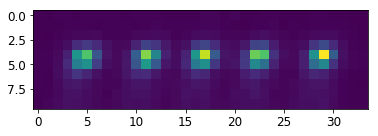

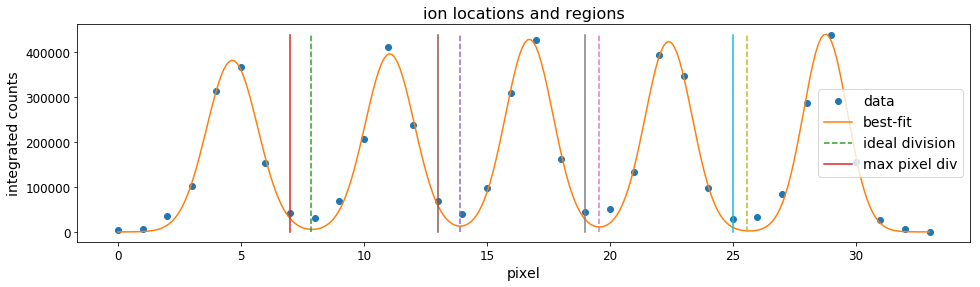

Ion 0
image width 8 pixels from 0 to 7
Cross-validation accuracy: 0.974 +/- 0.014
Ion 1
image width 6 pixels from 8 to 13
Cross-validation accuracy: 0.977 +/- 0.013
Ion 2
image width 6 pixels from 14 to 19
Cross-validation accuracy: 0.975 +/- 0.013
Ion 3
image width 6 pixels from 20 to 25
Cross-validation accuracy: 0.973 +/- 0.014
Ion 4
image width 8 pixels from 26 to 33
Cross-validation accuracy: 0.973 +/- 0.013


In [3]:
clf, div, scores = classifier_train2(N,repetitions,img_shape,prefix,year,date,brightID,darkID)

## From here on only plotting and old stuff

read 120 data points with 500 repetitions (None points, 500 repetitions requested)
image width 8 pixels from 0 to 7
image width 6 pixels from 8 to 13
image width 6 pixels from 14 to 19
image width 6 pixels from 20 to 25
image width 8 pixels from 26 to 33
states classified: 4.0000000041118255e-06 seconds
starting Bayesian analysis
states classified: 9.999999988963282e-06 seconds
starting Bayesian analysis
states classified: 8.999999991488039e-06 seconds
starting Bayesian analysis
states classified: 9.000000005698894e-06 seconds
starting Bayesian analysis
states classified: 1.1999999998124622e-05 seconds
starting Bayesian analysis


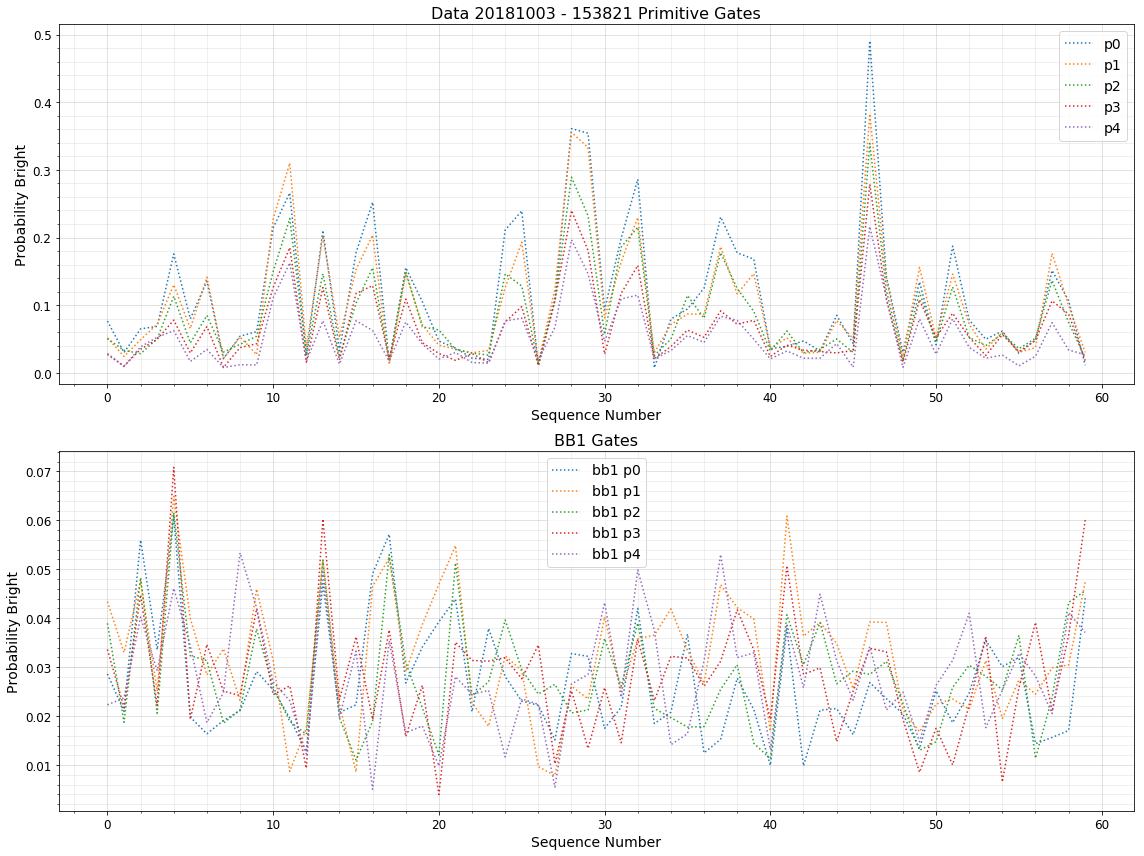

TypeError: Object does not appear to be a 8-bit string path or a Python file-like object

In [8]:
## amplitude scan 
date = '20181003'
fileID_Igor_list = ['153821']#, '140234', '145241', '151613', '160223']
fileID_Cam_list = None
reps = 500
n_points = 27
points = None#np.arange(5)

for fileID_Igor in fileID_Igor_list:
    
#     try:
#         #raise OSError
#         pn = np.loadtxt(Path(prefix + '/' + year + '/' + date + '/'+ date + '-'
#                                       + fileID_Igor + '/'
#                                       + date + '-' + fileID_Igor + 'BayesEval_probabilities.txt')).transpose()
        
#     except OSError:  
    [pn,pn_err] = runAnalysisN(5,
        prefix, year, date, fileID_Igor, reps, 1, img_shape, div, clf, points)

    np.savetxt(Path(prefix + '/' + year + '/' + date + '/'+ date + '-' + fileID_Igor + '/'
               + date + '-' + fileID_Igor + 'BayesEval_probabilities.txt'),
               pn.transpose() , delimiter=" ")

    np.savetxt(Path(prefix + '/' + year + '/' + date + '/'+ date + '-' + fileID_Igor + '/'
               + date + '-' + fileID_Igor + 'BayesEval_errors_minus.txt'),
               pn_err[:, 0, :].transpose() , delimiter=" ")

    np.savetxt(Path(prefix + '/' + year + '/' + date + '/'+ date + '-' + fileID_Igor + '/'
               + date + '-' + fileID_Igor + 'BayesEval_errors_plus.txt'),
               pn_err[:, 1, :].transpose() , delimiter=" ")
        
    n_points = np.ceil( np.shape(pn/2)[1] / 2 )
    n_points_bb1 = np.floor( np.shape(pn/2)[1] / 2 )
    
    x_axis = np.arange(n_points)
    x_axis_bb1 = np.arange(n_points_bb1)
    #x_axis =  np.loadtxt(Path(prefix + '/' + year + '/' + date + '/'+ date + '-' + fileID_Igor + '/'
    #           + date + '-' + fileID_Igor + 'save_data.txt'), skiprows=1).transpose()[0, 0:n_points]

    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 12))
    for n in range(np.shape(pn)[0]):
        ax[0].plot(x_axis, pn[n, ::2], ':', label='p' + str(n))
        ax[1].plot(x_axis_bb1, pn[n, 1::2], ':', label='bb1 p' + str(n))

    ax[0].legend()
    ax[0].minorticks_on()
    ax[0].grid(which='minor', alpha=0.25)
    ax[0].grid(which='major', alpha=0.45)
    ax[0].set_ylabel('Probability Bright')
    title = 'Data ' + date + ' - '+ fileID_Igor + " Primitive Gates"
    ax[0].set_title(title)
    ax[0].set_xlabel('Sequence Number')
    ax[1].legend()
    ax[1].minorticks_on()
    ax[1].grid(which='minor', alpha=0.25)
    ax[1].grid(which='major', alpha=0.45)
    ax[1].set_xlabel('Sequence Number')
    ax[1].set_ylabel('Probability Bright')
    ax[1].set_title("BB1 Gates")
    #ax[0].set_ylim((0, 0.5))
    #ax[1].set_ylim((0, 0.5))
    title = 'Data ' + date + ' - '+ fileID_Igor

    plt.tight_layout()
    plt.show()

    fig.savefig(Path(prefix + '/' + year + '/' + date + '/'+ date + '-' + fileID_Igor + '/'
                + date + '-' + fileID_Igor + 'BayesEval.png'))



In [48]:
import pandas

means = []

for n in range(5):
    means.append([np.mean(pn[n, ::2]), np.mean(pn[n, 1::2])])
print('Mean Values')
mean_table = pandas.DataFrame(means, ['0', '1', '2', '3', '4'], ['Prim', 'BB1'])    
print(mean_table)

Mean Values
       Prim       BB1
0  0.116574  0.028366
1  0.102142  0.031284
2  0.087528  0.028557
3  0.068556  0.028306
4  0.053347  0.028762


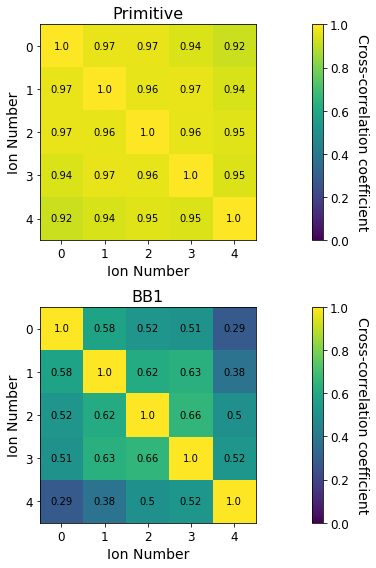

In [36]:
import pandas
import statsmodels.api as sm
from statsmodels.formula.api import ols

data = pandas.DataFrame(pn[:, ::2].transpose())
data_bb1 = pandas.DataFrame(pn[:, 1::2].transpose())
corr = data.corr()
corr_bb1 = data_bb1.corr()

fig, ax = plt.subplots(nrows = 2, ncols=1, figsize=(16, 8))
im = ax[0].imshow(corr, vmin=0, vmax=1)
im_bb1 = ax[1].imshow(corr_bb1, vmin=0, vmax=1)
                      
# Loop over data dimensions and create text annotations.
for i in range(5):
    for j in range(5):
        text = ax[0].text(j, i, corr.at[i, j].round(2),
                          ha="center", va="center", color="k")
        text = ax[1].text(j, i, corr_bb1.at[i, j].round(2),
                          ha="center", va="center", color="k")
                      
cbar = ax[0].figure.colorbar(im, ax=ax[0], )
cbar_bb1 = ax[1].figure.colorbar(im_bb1, ax=ax[1])
cbar.set_label('Cross-correlation coefficient', rotation=270, labelpad=20)
cbar_bb1.set_label('Cross-correlation coefficient', rotation=270, labelpad=20)

ax[0].set_title("Primitive")
ax[1].set_title("BB1")
ax[0].set_xlabel("Ion Number")
ax[1].set_xlabel("Ion Number")
ax[0].set_ylabel("Ion Number")
ax[1].set_ylabel("Ion Number")

plt.tight_layout()

plt.show()
